# Simple Approach to Multi-Label Classification

## 1. EDA

In [29]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:
data_path = "train.csv"

In [4]:
data_raw = pd.read_csv(data_path)
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(159571, 8)

In [5]:
data_raw.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data_raw.iloc[70:75,:]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
70,002a13f2896596fa,"""\n\nOppose – As the article stands, it does n...",0,0,0,0,0,0
71,002a6beca33307b3,I would appreciate an apology from both of you...,0,0,0,0,0,0
72,002b90cc8a94c76b,"They are NOT original research, they are point...",0,0,0,0,0,0
73,002c9cccf2f1d05b,"""\n Ambiguous ? \nSo Mabuska Irish can mean mo...",0,0,0,0,0,0
74,002d6c9d9f85e81f,"""\nWhile the magazine's masthead says """"TIME""""...",0,0,0,0,0,0


In [7]:
data_raw.id.describe()

count               159571
unique              159571
top       f797320cd347f535
freq                     1
Name: id, dtype: object

In [8]:
data_raw.comment_text.describe()

count                                                159571
unique                                               159571
top       We've got a tricky trip to Swindon next, befor...
freq                                                      1
Name: comment_text, dtype: object

In [9]:
data_raw.comment_text.isnull().sum()

0

In [10]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8




**Sample data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### 1.1. Checking for missing values

In [11]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


### 1.2. Calculating number of comments under each label

In [12]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [13]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [14]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


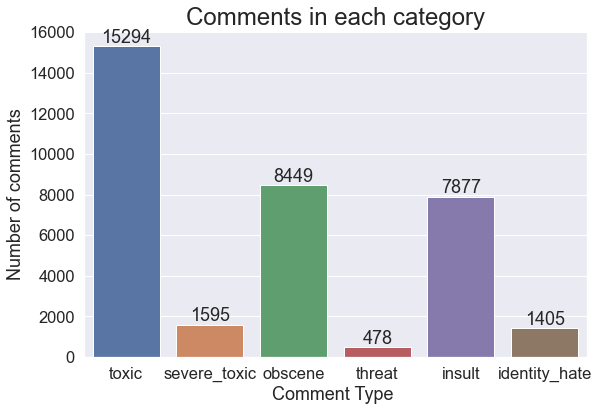

In [15]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(9,6))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
#     print(height)
#     print(rect.get_x())
    # x,y,label, (x,y)position to pose label
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [16]:
ax.patches

In [17]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
# multiLabel_counts = rowSums.value_counts()
# multiLabel_counts = multiLabel_counts.iloc[1:]
rowSums.value_counts()
print(type(rowSums))

<class 'pandas.core.series.Series'>


In [18]:
data_raw.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [19]:
multilabel = data_raw.iloc[:,2:].sum(axis=1).value_counts()[1:]

In [20]:
multilabel

1    6360
3    4209
2    3480
4    1760
5     385
6      31
dtype: int64

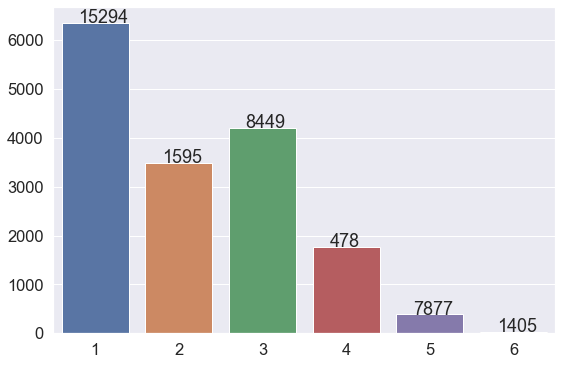

In [21]:
sns.set(font_scale=1.5)
plt.figure(figsize=(9,6))
ax = sns.barplot(multilabel.index,multilabel.values)
rects = ax.patches
labes = multilabel.values
for i,j in list(zip(rects,labels)):
    i.get_x()
    ax.text(i.get_x() + i.get_width()/4,i.get_height(),j)

### 1.3. Calculating number of comments having multiple labels

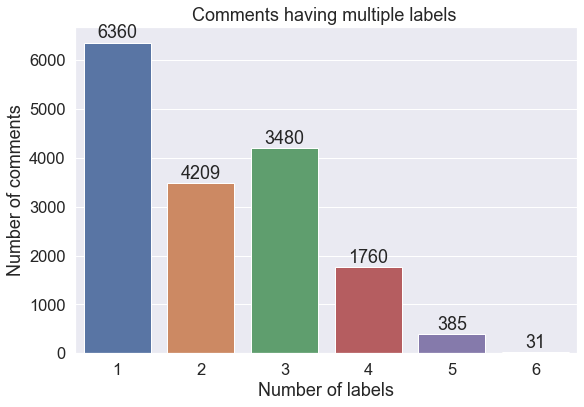

In [22]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts() # output series

multiLabel_counts = multiLabel_counts.iloc[1:] # drop zero

sns.set(font_scale = 1.5)
plt.figure(figsize=(9,6))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [31]:
from wordcloud import WordCloud,STOPWORDS


In [23]:
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values

In [24]:
text

array(['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK',
       'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...',
       "Bye! \n\nDon't look, come or think of comming back! Tosser.", ...,
       "Your absurd edits \n\nYour absurd edits on great white shark was total vandalism and was very sexual. All you edit here is fucking bullshit like spam all over this useful encyclopedia so stop all your bullshit. The admins have you everywhere. The only choice for you is to stop this bullshit or else you'll be blocked permanently. User:Factual80man",
       '"\n\nHey listen don\'t you ever!!!! Delete my edits ever again I\'m annoyed because the WWE 2K15 a few of the roster have been confirmed and your stupid ass deletes what

In [32]:
type(STOPWORDS)

set

In [33]:
len(STOPWORDS)

192

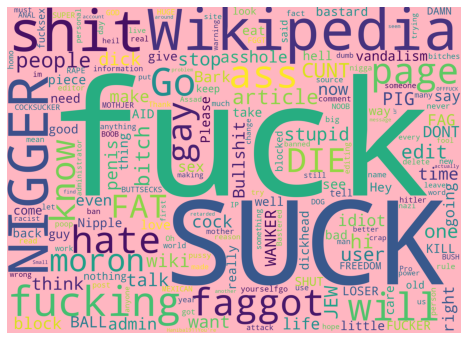

In [34]:

# toxic

cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='lightpink',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

# plt.subplot(2, 3, 1)
plt.figure(figsize=(9,6))
plt.axis('off')
# plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)
plt.savefig("fuck.jpg")
plt.show()



### 1.4. WordCloud representation of most used words in each category of comments

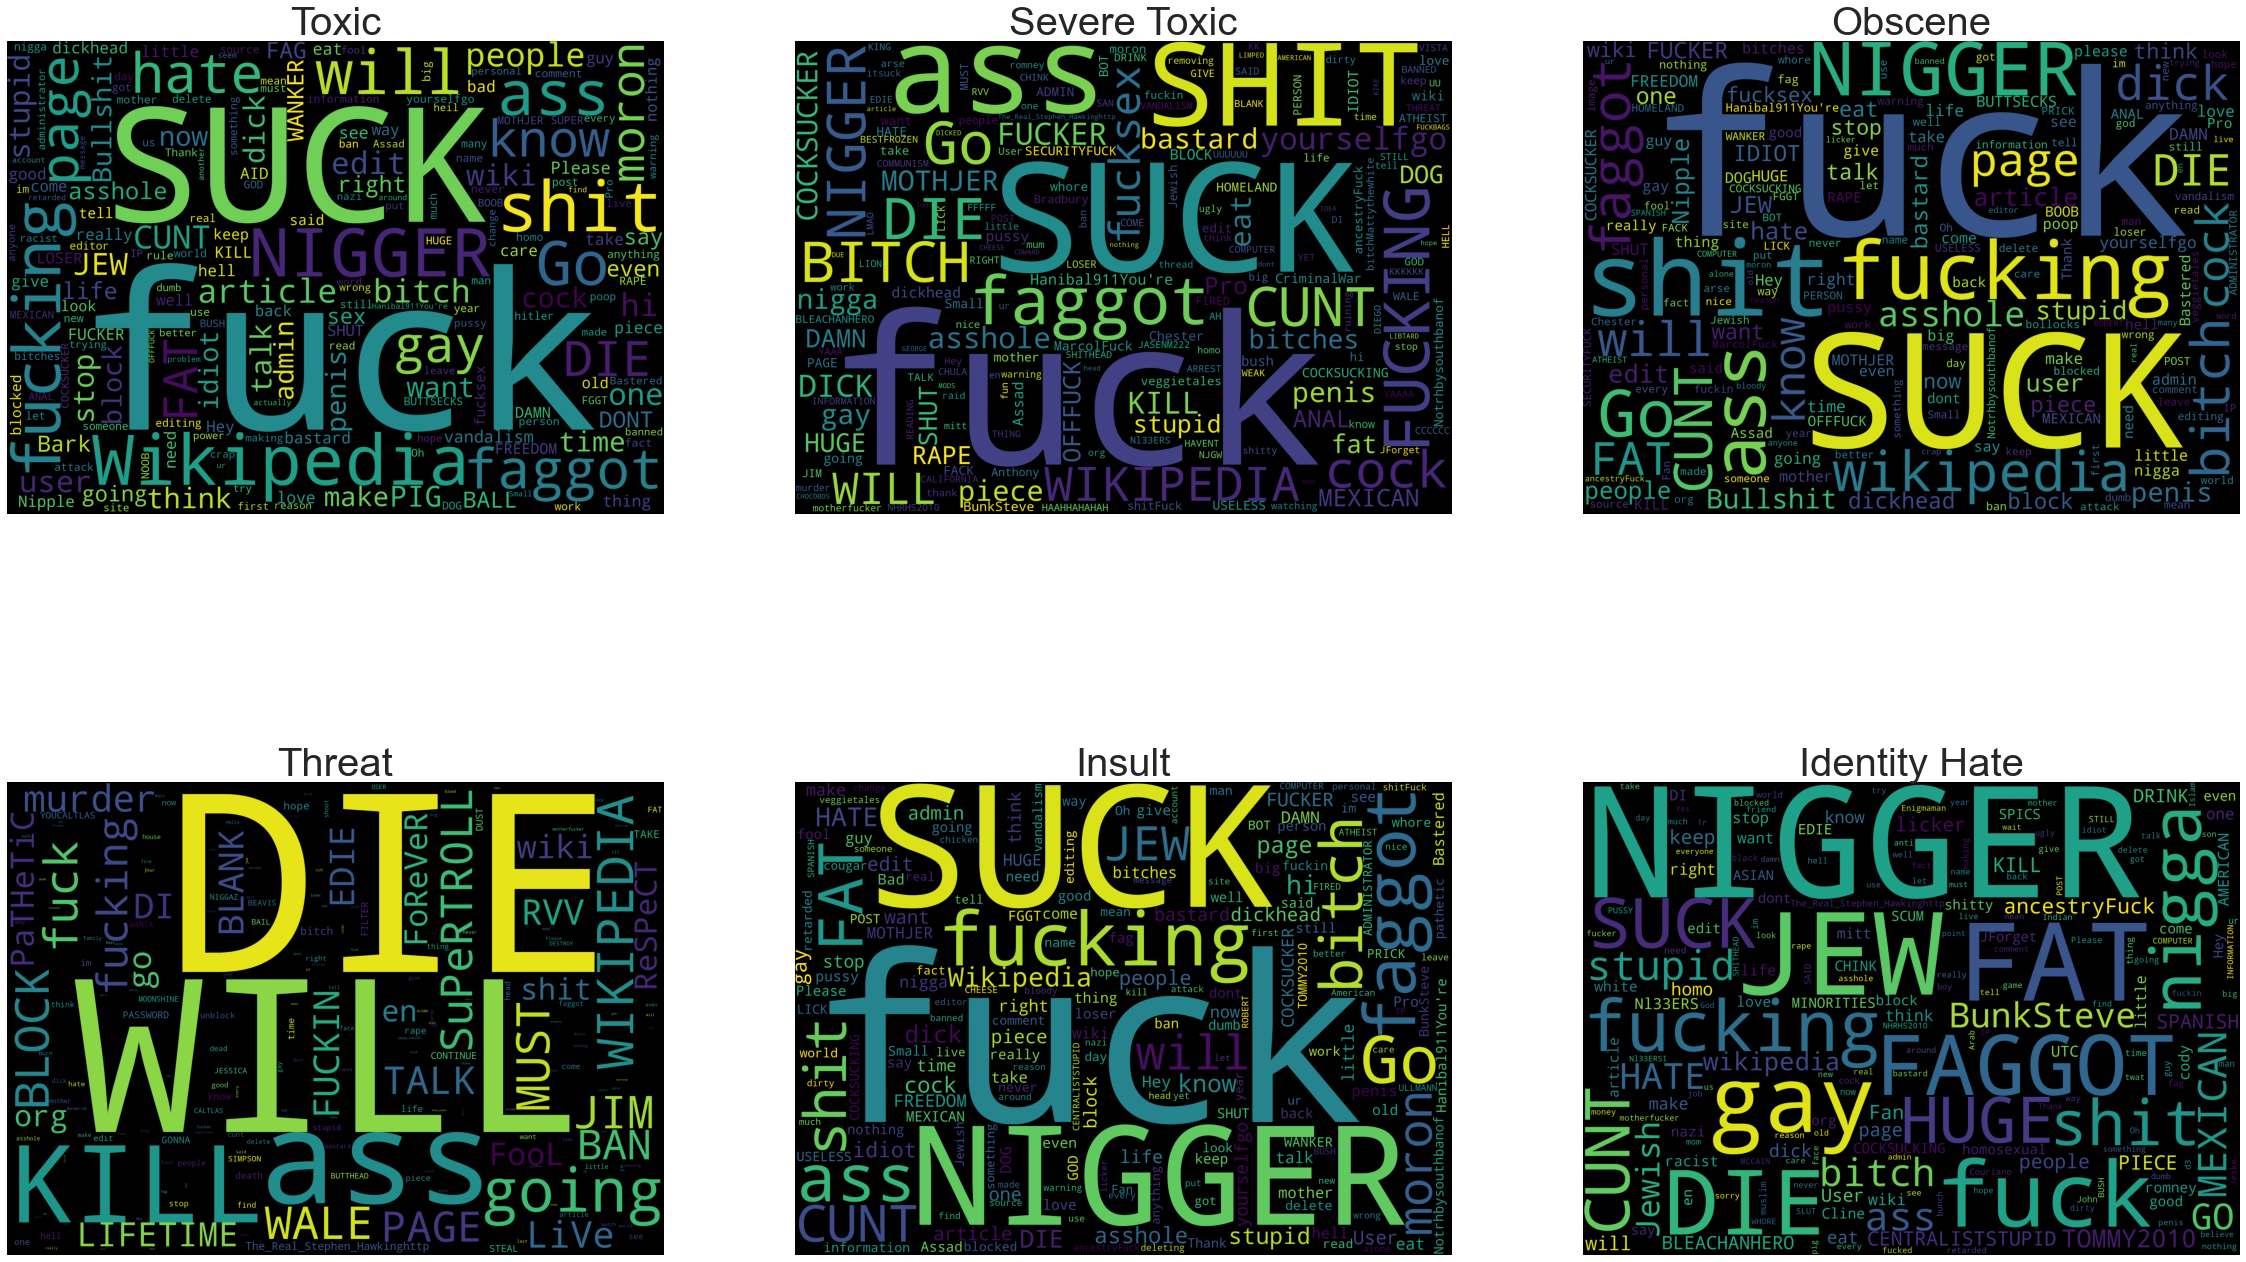

In [35]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

## 2. Data Pre-Processing

In [36]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [38]:
stopwords

<WordListCorpusReader in 'C:\\Users\\herman\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [39]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

In [40]:
cleanHtml("<tabl>heloo</table>")

' heloo '

In [41]:

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#|$|@]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


In [42]:
cleanPunc("hel@$lo,iam#,$kiko#ff")

'hello iam kikoff'

In [43]:
re.sub(r"[\w]{1}o","&","zooozozi")

'&&&zi'

In [44]:
re.sub('[^a-z|^A-Z]+', '-', "@@kjlkjAA--")

'-kjlkjAA-'

In [45]:

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [46]:
keepAlpha("Applffe")

'Applffe'

In [47]:
"Applffe".split()

['Applffe']

### 2.1. Cleaning Data

In [48]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [49]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
2797,0789ff49e3dd621a,buying a lotto ticket doesnt count either or d...,0,0,0,0,0,0
118109,76f5ac279ad0cbd4,i would propose this segas th generation syst...,0,0,0,0,0,0
54406,9160bda3e6019048,thanks although his vile accusations of raci...,0,0,0,0,0,0
63090,a8cd89a0d7d77406,well its about time that cj dub got blocked bu...,1,0,0,0,0,0
2804,078e175d3d7ea1ab,language s please do not contribute text in sl...,0,0,0,0,0,0


In [50]:
nltk.download("stopwords")
stopwords.words()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [51]:
stop_words = set(stopwords.words('english'))

In [53]:
len(stop_words)


179

### 2.2. Removing Stop Words

In [194]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()








,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
40348,6baa59ff18ddda12,mr lulu screed statement latest daily slande...,0,0,0,0,0,0
159427,fd7fd3896b04bd84,january discussion,0,0,0,0,0,0
12328,20b007a7665b49fc,situation zimbabwean dollar highest ...,0,0,0,0,0,0
68636,b7a0bb336f6e7f9f,lol youre incompetent place proper warning ...,1,0,1,0,1,0
122569,8f9e372c82ab84f3,youre welcome trick treat,0,0,0,0,0,0


In [205]:
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub("", sentence)
removeStopWords("Can you help detect toxic comments ― and minimize unintended model bias? That's your challenge in this competition.")

'help detect toxic comments ― minimize unintended model bias? challenge competition.'

In [195]:
stop_words

{'a',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'beside',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'eight',
 'few',
 'five',
 'for',
 'four',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'may',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'nine',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'o

In [199]:
re.sub("["+ "|".join(stop_words) + "]", "&"," or me go to the hell iam kiko")

' && && && && &&& &&&& &&& k&k&'

In [202]:
re.sub("(or|ro|hell)","&"," me or ro go to the hell")

' me & & go to the &'

In [196]:
"|".join(stop_words)

"or|during|with|itself|is|couldn|have|him|before|t|my|am|a|nor|wouldn't|further|aren't|most|can|you|yours|just|won't|any|you'd|on|ve|how|s|don't|beside|and|did|yourself|she's|against|needn|all|two|where|their|into|been|yourselves|in|under|they|its|it's|doesn't|being|one|his|through|that|ma|mightn|himself|from|i|wasn|don|such|having|yet|be|within|for|six|more|do|ll|her|only|so|weren't|who|hadn't|too|haven|own|those|won|because|over|mightn't|eight|you'll|there|our|off|myself|theirs|shouldn|until|haven't|what|ain|this|ourselves|five|o|me|down|than|may|was|are|between|weren|m|seven|shan|you're|ours|themselves|here|re|d|should've|she|the|below|we|by|while|not|above|shan't|hers|herself|does|some|didn|hasn't|wouldn|why|four|however|at|has|nine|couldn't|these|when|doing|should|across|about|few|needn't|no|an|both|doesn|it|shouldn't|y|each|isn't|among|also|ten|to|other|isn|now|but|mustn't|hasn|same|out|wasn't|which|again|aren|after|were|whom|then|that'll|of|hadn|them|you've|three|once|your|zero|

In [206]:
stemmer = SnowballStemmer("english")

In [209]:
stemmer.stem("doing")

'do'

In [210]:
stemmer.stem("walking")

'walk'

In [212]:
stemmer.stem("flying")

'fli'

In [214]:
stemmer.stem("sophisiticated")

'sophisit'

### 2.3. Stemming

In [18]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
108305,42fdb3027a4ca9f5,apart ad odd word hadnt touch near year,0,0,0,0,0,0
65705,afbec12bbe7d9fda,consensus take npov noticeboard youll see happen,0,0,0,0,0,0
137312,deaa002fef0e89c0,actual quit good error need fix includ critic ...,0,0,0,0,0,0
48543,81d57be4398b9b1c,request move dialect level dialect level brita...,0,0,0,0,0,0
121368,896a0148135147b5,rewrit use lot content wikifi restructur neutr...,0,0,0,0,0,0


In [215]:
data.shape

(2000, 8)

In [54]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
2797,0789ff49e3dd621a,buying a lotto ticket doesnt count either or d...,0,0,0,0,0,0
118109,76f5ac279ad0cbd4,i would propose this segas th generation syst...,0,0,0,0,0,0
54406,9160bda3e6019048,thanks although his vile accusations of raci...,0,0,0,0,0,0
63090,a8cd89a0d7d77406,well its about time that cj dub got blocked bu...,1,0,0,0,0,0
2804,078e175d3d7ea1ab,language s please do not contribute text in sl...,0,0,0,0,0,0


### 2.4. Train-Test Split

In [56]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [57]:
train_text = train['comment_text']
test_text = test['comment_text']

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
corpus = [
     'This is the first document.',
    'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]

In [60]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [61]:
X.shape


(4, 9)

In [62]:
from scipy.sparse import csr_matrix

In [63]:
csr_matrix.todense(X)

matrix([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524],
        [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
         0.53864762, 0.28108867, 0.        , 0.28108867],
        [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
         0.        , 0.26710379, 0.51184851, 0.26710379],
        [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524]])

In [64]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

### 2.5. TF-IDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [66]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

In [69]:
x_train

<1400x64690 sparse matrix of type '<class 'numpy.float64'>'
	with 88379 stored elements in Compressed Sparse Row format>

## 3. Multi-Label Classification

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [72]:
categories

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [73]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
#     print("\n")

**Processing toxic comments...**

Test accuracy is 0.915


**Processing severe_toxic comments...**

Test accuracy is 0.995


**Processing obscene comments...**

Test accuracy is 0.9433333333333334


**Processing threat comments...**

Test accuracy is 1.0


**Processing insult comments...**

Test accuracy is 0.9583333333333334


**Processing identity_hate comments...**

Test accuracy is 0.9933333333333333
Wall time: 2.42 s


### 3.2. Multiple Binary Classifications - (Binary Relevance)

In [75]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9066666666666666


Wall time: 17.5 s


### 3.3. Classifier Chains

In [76]:
%%time
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

Wall time: 0 ns


In [77]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9066666666666666


Wall time: 20.6 s


### 3.4. Label Powerset

In [78]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [79]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9066666666666666


Wall time: 13.6 s


### 3.5. Adapted Algorithm

In [80]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [81]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.9216666666666666


Wall time: 3min 26s
